## Use case 1: Shower visualization

In [1]:
import ToyModel as tm

ModuleNotFoundError: No module named 'ToyModel'

#### Construction of a shower track

In [2]:
## Default vertical track and discretization
#track = tm.Track()
## Track with ground interaction point at 0.5 km east, 0.1 km north, zenith angle of 20 degrees and azimuth angle of 30 degrees
#track = tm.Track(x0=0.5, y0=0.1, theta=20., az=30.) #alt=70. can be used instead of theta=20.
## Setting ground level and top of the atmosphere (km asl), and the number of discretization steps
track = tm.Track(theta=20., h0=1.8, h_top=100., N_steps=600)

In [3]:
## Help on Track constructor
#tm.Track?

In [4]:
## Data stored in Track object, subclass of DataFrame
track

,x,y,z,t
0,0.0,0.029785,0.081833,348.282762
1,0.0,0.089355,0.245500,347.701807
2,0.0,0.148924,0.409167,347.120851
3,0.0,0.208494,0.572833,346.539896
4,0.0,0.268064,0.736500,345.958940
...,...,...,...,...
595,0.0,35.473813,97.463500,2.614299
596,0.0,35.533383,97.627167,2.033344
597,0.0,35.592953,97.790833,1.452388
598,0.0,35.652522,97.954500,0.871433


In [5]:
## Some attributes and methods of Track objects:
track = tm.Track(x0=0.5, y0=0.1, theta=20., az=120., h0=1.8)
print("Unit vector parallel to shower axis (upwards):", (track.ux, track.uy, track.uz) )
print("Coordinates of ground interaction point:", (track.x0, track.y0, 0.) )
print("Coordinates of shower point at 3.5 km a.s.l.:", track.h_to_xyz(3.5))
print("Travel time in us of shower front at 27 km above observation level:", track.z_to_t(27.))

Unit vector parallel to shower axis (upwards): (0.29619813272602386, -0.17101007166283427, 0.9396926207859084)
Coordinates of ground interaction point: (0.5, 0.1, 0.0)
Coordinates of shower point at 3.5 km a.s.l.: (1.0358526974630378, -0.2093746991262718, 1.7)
Travel time in us of shower front at 27 km above observation level: 298.272204399376


In [6]:
## Help on Track object
#track?

#### Construction of a telescope and shower track projection

In [7]:
## Default telescope positioned at 0.1 km east and 0.2 km south
#telescope = tm.Telescope(x=0.1, y=-0.2)
## Setting the pointing direction and aperture
telescope = tm.Telescope(x=0.1, y=-0.2, z=0.1, theta=20., az=120., apert=10.)

In [8]:
## Help on Telescope constructor
#tm.Telescope?
## Help on Telescope object
#telescope?

In [9]:
## Calculation of coordinates (alt/az and theta/phi) of shower track relative to telescope position
projection = tm.Projection(telescope, track)
## Equivalent method of track
#projection = track.Projection(telescope)
## Equivalent method of telescope
#projection = telescope.Projection(track)

In [10]:
## Data stored in Projection object, subclass of DataFrame
## beta is the angular distance of each shower point relative to the apparent position of the cosmic-ray source
projection

,distance,alt,az,theta,phi,beta,time,FoV
0,0.515540,0.103984,56.887513,81.003132,306.074599,81.003132,1.447039,False
1,0.588703,20.151143,63.697352,59.876772,306.074599,59.876772,0.974510,False
2,0.720876,34.150606,69.578691,44.939486,306.074599,44.939486,0.698813,False
3,0.886033,43.201629,74.608921,35.078197,306.074599,35.078197,0.533135,False
4,1.068993,49.134256,78.897894,28.446219,306.074599,28.446219,0.426844,False
...,...,...,...,...,...,...,...,...
545,117.162399,69.891810,119.345934,0.249013,306.074599,0.249013,0.000030,True
546,117.377224,69.892011,119.347125,0.248557,306.074599,0.248557,0.000023,True
547,117.592049,69.892210,119.348311,0.248103,306.074599,0.248103,0.000017,True
548,117.806874,69.892409,119.349493,0.247651,306.074599,0.247651,0.000010,True


In [11]:
## Help on Projection constructor
#tm.Projection?
## Help on Projection object
#projection?

In [12]:
## Some attributes and methods of Telescope and Projection objects:
print("Angular aperture in degrees of the telescope:", telescope.apert)
print("Unit vector parallel to the telescope pointing direction:", (telescope.ux, telescope.uy, telescope.uz) )
print("Position angle (from north) of the right-hand direction from the telescope point of view:", telescope.phi_right )
print("FoV coordinates theta/phi corresponding to alt=72., az=120. relative to telescope:",
      telescope.altaz_to_thetaphi(72., 120.)) #Equivalent to projection.altaz_to_thetaphi(72., 120.)
print("theta/phi coordinates of the apparent position of the cosmic-ray source:", (projection.theta_inf, projection.phi_inf) )
print("Angular distance of the ground interaction point relative to the apparent position of the cosmic-ray source:",
     projection.beta_0)

Angular aperture in degrees of the telescope: 10.0
Unit vector parallel to the telescope pointing direction: (0.29619813272602386, -0.17101007166283427, 0.9396926207859084)
Position angle (from north) of the right-hand direction from the telescope point of view: 151.51876171866053
FoV coordinates theta/phi corresponding to alt=72., az=120. relative to telescope: (1.9999999999999472, 61.51876171866053)
theta/phi coordinates of the apparent position of the cosmic-ray source: (0.0, 255.55500518658698)
Angular distance of the ground interaction point relative to the apparent position of the cosmic-ray source: 93.01201998391794


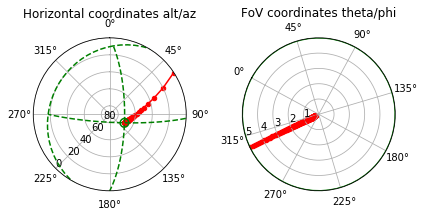

In [13]:
## Track visualization
#projection.show();
## Plots can be stored in PolarAxesSubplot objects for later modification
#ax1, ax2 = projection.show()
## Equivalent method of track
#projection, (ax1, ax2) = track.show_projection(telescope)
## Some plot options
projection.show(max_theta=5.); #Maximum offset angle in the FoV plot
#projection.show(axes=False, X_mark=400.); #Blue mark at slanth depth of 400 g/cm2 (it depends on atmosphere model, see UC2)

In [14]:
## Help on show_projection
#track.show_projection?